In [4]:
import warnings
warnings.filterwarnings('ignore')
import math
import random
import numpy as np
import pandas as pd
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import itertools
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Embedding, Lambda
from keras.optimizers import Adam
from keras.models import Model
import keras.backend as K

In [2]:
def errors(x,y,X_test, Y_test):
    
    clf = LinearRegression()
    clf.fit(x, y)
    y_pred= clf.predict(X_test)
    Y_test.shape = (test_size,)
    y_pred.shape = (test_size,)
    k = np.abs(y_pred-Y_test)
    K = k[k<1]
    sort = np.argsort(Y_test[k<1])
    
    plt.figure(figsize=(15,7))
    plt.subplot(1, 2, 1)
    plt.xlabel("Test dataset ID")
    plt.ylabel("Accuracy")
    plt.title("Accuracy prediction using a Linear Regression")
    plt.plot(range(len(K)),y_pred[k<1][sort],'.',label='Predicted accuracy')
    plt.plot(range(len(K)), Y_test[k<1][sort],'.', label='Accuracy')
    plt.legend(loc='lower right')
    
    print('Error: ',np.mean(K),test_size-len(K))
    
    model = Sequential()
    model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    es = EarlyStopping(monitor='val_loss',
                       mode='min',
                       patience=4000,
                       restore_best_weights = True)

    history = model.fit(x, y,
                        validation_data = (X_test, Y_test),
                        callbacks=[es],
                        epochs=100,
                        batch_size=50,
                        verbose=0)

    y_pred = model.predict(X_test)
    Y_test.shape = (test_size,)
    y_pred.shape = (test_size,)
    k = np.abs(y_pred-Y_test)
    K = k[k<1]
    sort = np.argsort(Y_test[k<1])
    
    print('Error: ',np.mean(K),test_size-len(K))
    
    plt.subplot(1, 2, 2)
    plt.xlabel("Test dataset ID")
    plt.ylabel("Accuracy")
    plt.title("Accuracy prediction using a Neural Network")
    plt.plot(range(len(K)),y_pred[k<1][sort],'.',label='Predicted accuracy')
    plt.plot(range(len(K)), Y_test[k<1][sort],'.', label='Accuracy')
    plt.legend(loc='lower right')
    plt.show()    

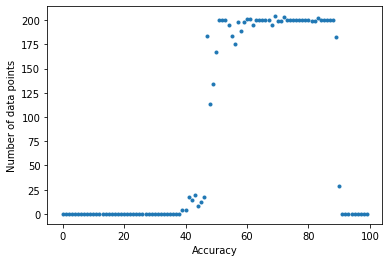

8442


In [34]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
y = np.array(y)
accs = np.zeros(100)
for i in range(len(y)):
    k = int(y[i]*100)
    accs[k] += 1
plt.plot(range(100),accs, '.')
plt.xlabel('Accuracy')
plt.ylabel("Number of data points")
plt.show()
print(len(y))

# Addition Transformation

Error:  0.10242186161632949 0
32/32 [==============================] - 0s 1ms/step
Error:  0.11171302509918211 0


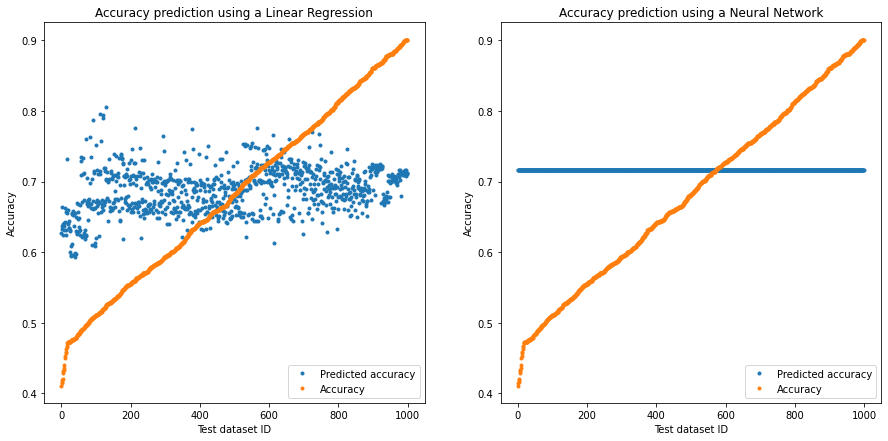

In [23]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x, axis = 1)
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test, axis = 1)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)
    
errors(x,y,X_test, Y_test)


# Space-filling Z-curve

(7000, 2500) (7000,)
Error:  0.031340440359881504 0
32/32 [==============================] - 0s 3ms/step
Error:  0.029089408521461486 0


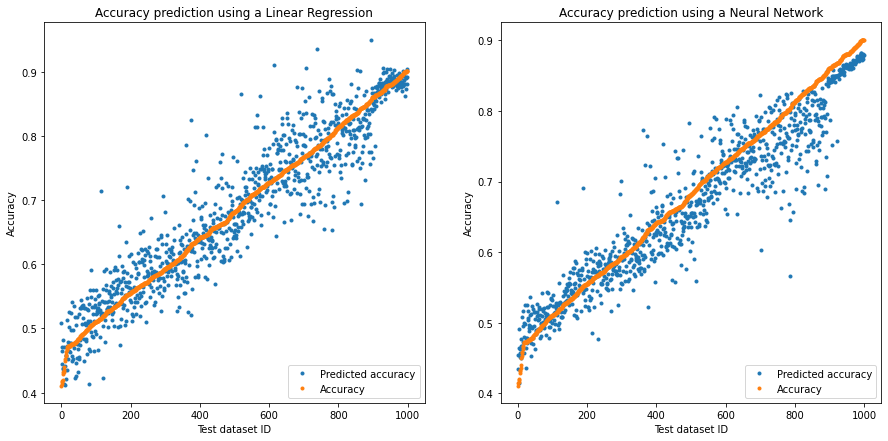

In [24]:
import zCurve as z 

def order(x, precision=10):
    m,n,_ = x.shape
    b = (np.copy(x)*precision).astype(int)
    c = np.zeros((m,n)).astype(int)
    for i in range(m):
        for j in range(n):
            c[i][j] += z.interlace(int(b[i][j][0]),int(b[i][j][1]))
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

print(x.shape, y.shape)
errors(x,y,X_test, Y_test)

# Pyramid ordering (max)

Error:  0.02896950772575397 0
32/32 [==============================] - 0s 2ms/step
Error:  0.02580876347651482 0


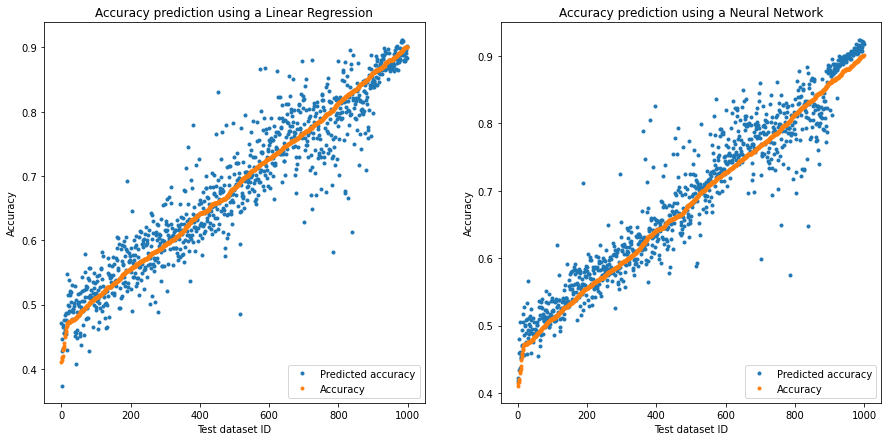

In [25]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

errors(x,y,X_test, Y_test)

# Pyramic Ordering (min)

Error:  0.029848777148437502 0
32/32 [==============================] - 0s 2ms/step
Error:  0.025852624273872377 0


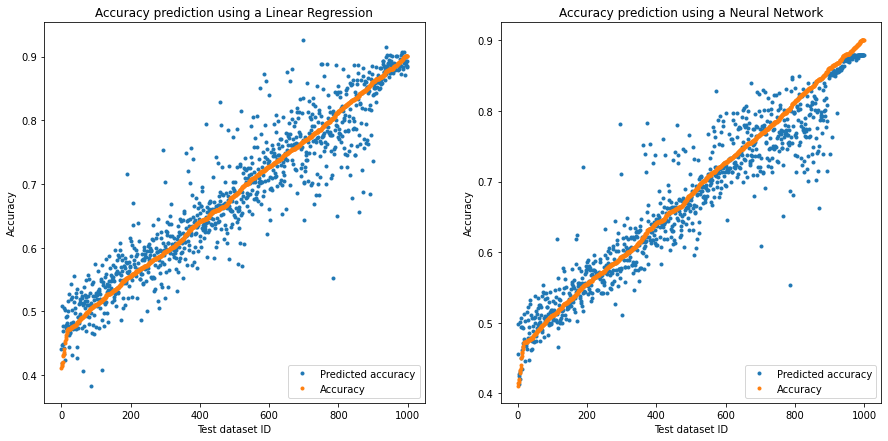

In [26]:
def order(x):
    m,n,_ = x.shape
    c = np.min(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

errors(x,y,X_test, Y_test)

# Sum pooling

(7000, 25) (7000,)
Error:  0.10067645246133948 0
32/32 [==============================] - 0s 1ms/step
Error:  0.10966536002197266 0


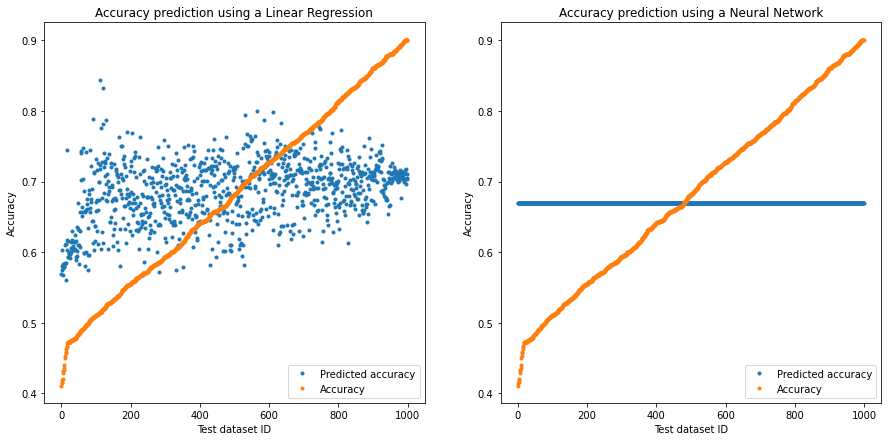

In [27]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x.transpose(1,2).resize(len(y),25,100), 2).resize(len(y),25)
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])
print(x.shape, y.shape)

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test.transpose(1,2).resize(len(Y_test),25,100), 2).resize(len(Y_test),25)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (7000,1)
Y_test.shape = (1000,1)


    
errors(x,y,X_test, Y_test)

# Order and sum pooling

Error:  0.03990579123021321 0
32/32 [==============================] - 0s 1ms/step
Error:  0.024885607289123538 0


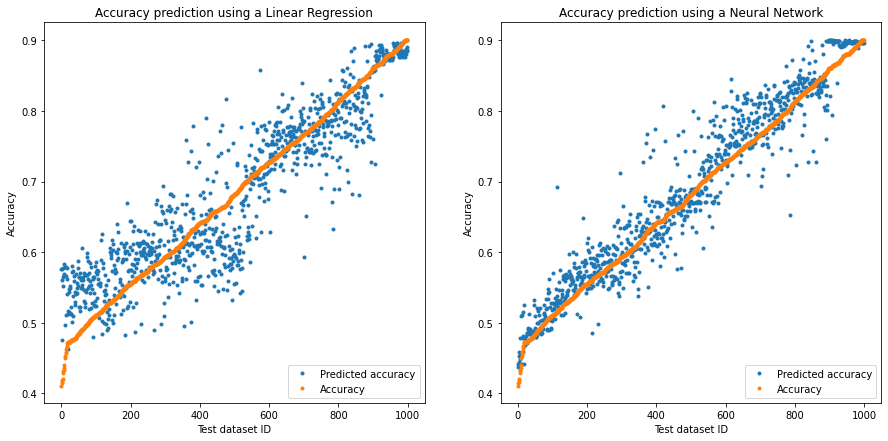

In [28]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
x = torch.tensor(x).resize(7000,500,5)
x = torch.sum(x.transpose(1,2).resize(7000,25,100), 2)
x = np.array(x)
y = np.array(y[:train_size])



X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
X_test = torch.tensor(X_test).resize(1000,500,5)
X_test = torch.sum(X_test.transpose(1,2).resize(1000,25,100), 2)
X_test= np.array(X_test)
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)


errors(x,y,X_test, Y_test)

# Mapping to Covariance Matrix

Error:  0.035849879260823406 0
32/32 [==============================] - 0s 2ms/step
Error:  0.024985545388603207 0


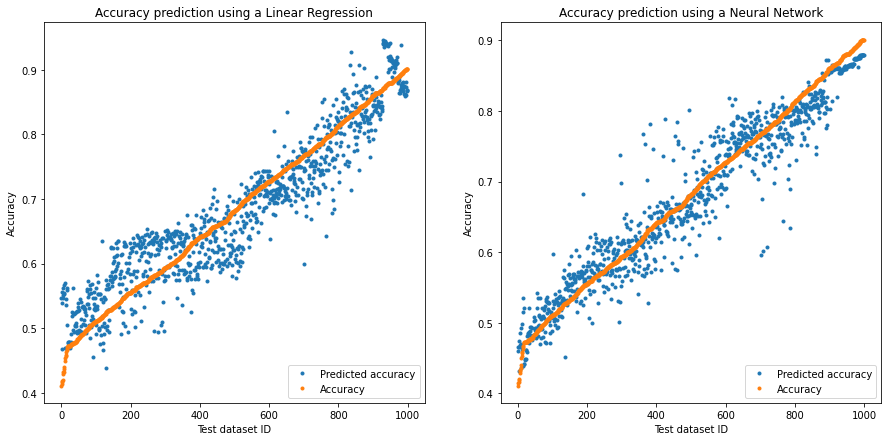

In [29]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X = []
for i in range(len(x)):
    X.append(np.cov(x[i].transpose()))

x = np.copy(X)

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

X = []
for i in range(len(X_test)):
    X.append(np.cov(X_test[i].transpose()))

X_test = np.copy(X)

x.shape = (train_size, np.prod(x.shape)//train_size)
X_test.shape = (test_size, np.prod(X_test.shape)//test_size)
y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)


# Mean, median, variance

Error:  0.051124535754098935 0
32/32 [==============================] - 0s 1ms/step
Error:  0.03418783254818916 0


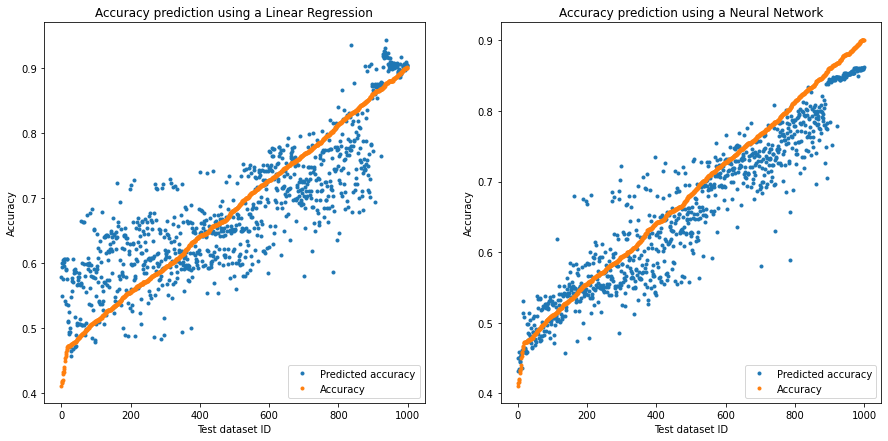

In [30]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X = []
X.append(np.mean(x,1))
X.append(np.median(x,1))
X.append(np.std(x,1))

x = np.copy(X)

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

X = []
X.append(np.mean(X_test,1))
X.append(np.median(X_test,1))
X.append(np.std(X_test,1))


X_test = np.copy(X)

x = np.transpose(x,(1,0,2))
X_test = np.transpose(X_test ,(1,0,2))

x = np.reshape(x, (train_size, 15))
X_test = np.reshape(X_test, (test_size, 15))

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)


# Covariance and stats

(7000, 8, 5)
Error:  0.03295475162703456 0
32/32 [==============================] - 0s 1ms/step
Error:  0.019870563079500202 0


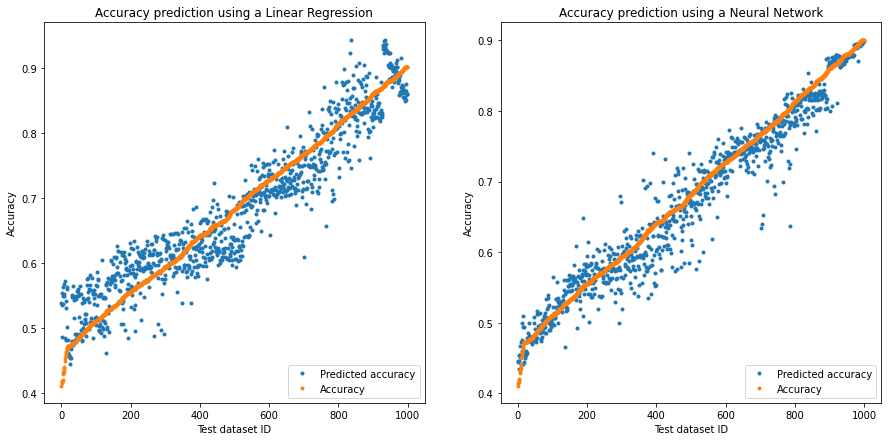

In [53]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X = []
for i in range(len(x)):
    X.append(np.concatenate((np.cov(x[i].transpose()),[np.mean(x[i],0), np.median(x[i],0), np.std(x[i],0)]),0))

x = np.copy(X)
print(x.shape)
X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

X = []
for i in range(len(X_test)):
    X.append(np.concatenate((np.cov(X_test[i].transpose()), [np.mean(X_test[i],0), np.median(X_test[i],0), np.std(X_test[i],0)]),0))
X_test = np.copy(X)

x.shape = (train_size, np.prod(x.shape)//train_size)
X_test.shape = (test_size, np.prod(X_test.shape)//test_size)
y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)

(7000, 500, 5)
(7000, 13, 5)
Error:  0.028558184362027804 0
32/32 [==============================] - 0s 1ms/step
Error:  0.024631773233366013 0


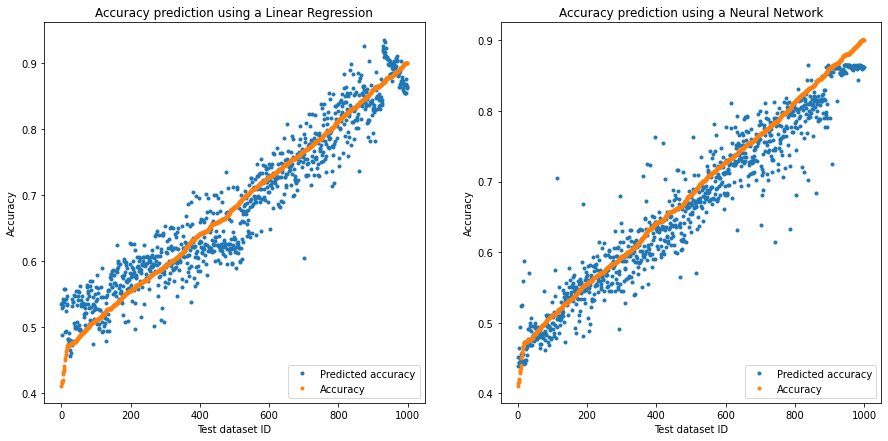

In [63]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d


x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = order(np.array(x[:train_size]))
print(x.shape)

y = np.array(y[:train_size])



X = []
for i in range(len(x)):
    temp = np.concatenate((np.cov(x[i].transpose()),[np.mean(x[i],0), np.median(x[i],0), np.std(x[i],0)]),0)
    X.append(np.concatenate((np.reshape(np.sum(np.reshape(x[i].transpose(),(25,100)), 1),(5,5)), np.copy(temp)),0))
    
x = np.copy(X)
print(x.shape)
X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000

X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])
X_test = order(X_test)

             
X = []
for i in range(len(X_test)):
    temp = np.concatenate((np.cov(X_test[i].transpose()), [np.mean(X_test[i],0), np.median(X_test[i],0), np.std(X_test[i],0)]),0)
    X.append(np.concatenate((np.reshape(np.sum(np.reshape(X_test[i].transpose(),(25,100)), 1),(5,5)), np.copy(temp)),0))

X_test = np.copy(X)

x.shape = (train_size, np.prod(x.shape)//train_size)
X_test.shape = (test_size, np.prod(X_test.shape)//test_size)
y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)

# Training without changes

Error:  0.12766500246729226 0
32/32 [==============================] - 0s 2ms/step
Error:  0.0695352819322586 0


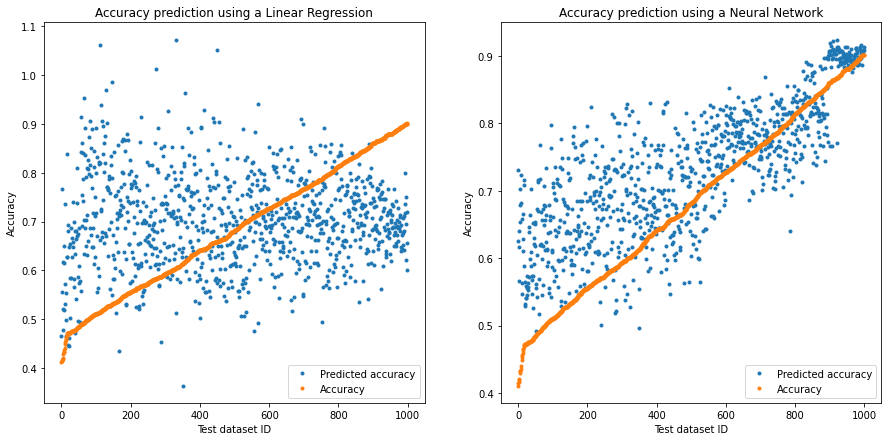

In [31]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

x = np.reshape(x, (train_size, 2500))
X_test = np.reshape(X_test, (test_size, 2500))

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

errors(x,y,X_test, Y_test)


# Baseline error

In [32]:
np.mean(np.abs(Y_test-np.mean(y)))

0.1094915104

# Deepsets

0.4795658145824432


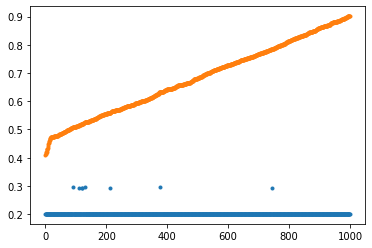

In [23]:
def get_deepset_model(max_length):
    input_txt = Input(shape=(max_length,))
    x = Embedding(11, 100, mask_zero=True)(input_txt)
    x = Dense(30, activation='tanh')(x)
    Adder = Lambda(lambda x: K.sum(x, axis=1), output_shape=(lambda shape: (shape[0], shape[2])))
    x = Adder(x)
    encoded = Dense(1)(x)
    summer = Model(input_txt, encoded)
    adam = Adam(lr=1e-4, epsilon=1e-3)
    summer.compile(optimizer=adam, loss='mae')
    return summer

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 7000
test_size = 1000
X_test = np.copy(np.array(x[train_size:train_size+test_size]))
Y_test = np.copy(np.array(y[train_size:train_size+test_size]))
x = np.array(x[:train_size])
y = np.array(y[:train_size])

x = np.reshape(x, (train_size, 2500))
X_test = np.reshape(X_test, (test_size, 2500))

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

X_test =  (X_test-np.min(x))/(np.max(x)-np.min(x))
x = (x-np.min(x))/(np.max(x)-np.min(x))

model = get_deepset_model(2500)
model.fit(x, y, epochs=100, batch_size=50, shuffle=True, validation_split=0.0123456789, verbose =0)

preds = model.predict(X_test, batch_size=50, verbose=0)

Y_test.shape = (1000,)
sort = np.argsort(Y_test)
preds.shape = Y_test.shape
plt.plot(preds[sort],'.',label='Predicted accuracy')
plt.plot(Y_test[sort],'.', label='Accuracy')
print(np.mean(np.abs(preds-Y_test)))
plt.show()